In [ ]:
# http://www.sherrytowers.com/kalman_filter_method.pdf

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import math

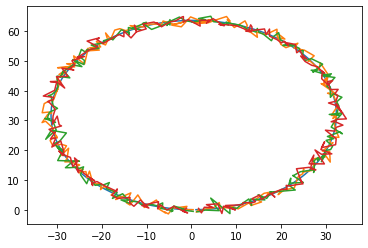

In [42]:
import pickle
true = pickle.load(open("true.pickle","rb"))
track1 = pickle.load(open("track1.pickle","rb"))
track2 = pickle.load(open("track2.pickle","rb"))
track3 = pickle.load(open("track3.pickle","rb"))

plt.plot(true[:,0], true[:,1])
plt.plot(track1[:,0], track1[:,1])
plt.plot(track2[:,0], track2[:,1])
plt.plot(track3[:,0], track3[:,1])

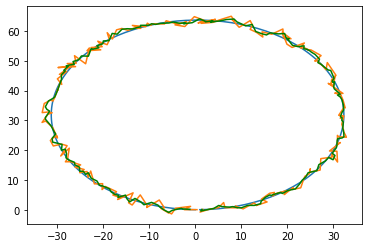

0.8196661460036311


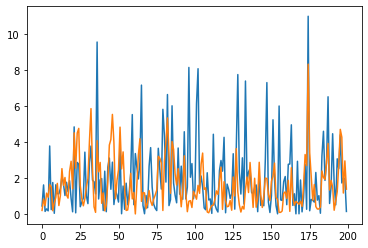

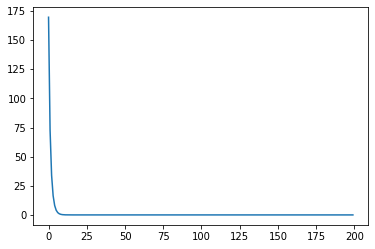

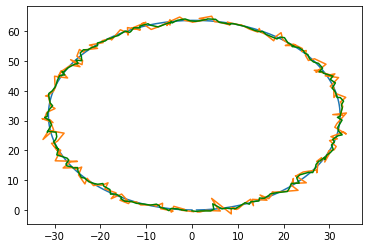

0.7534176207295146


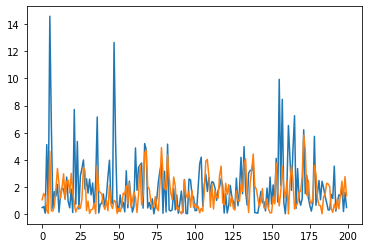

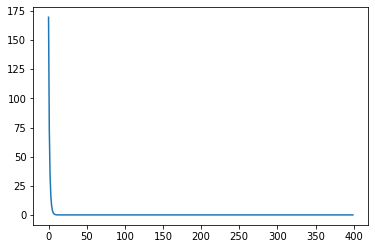

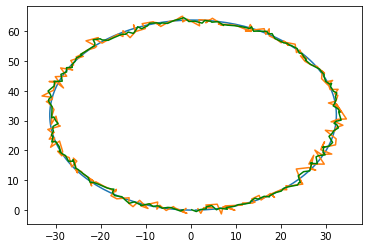

0.8495593767397436


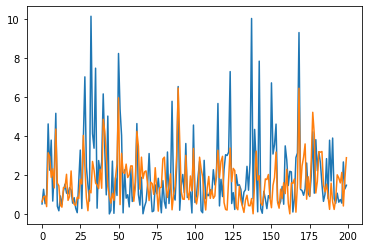

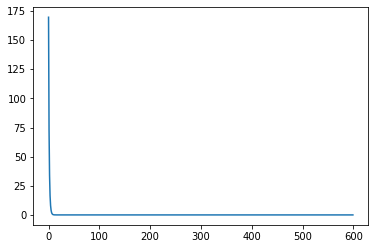

In [58]:
def F(t):
    return np.array([[1, t],
                     [0, 1]])

def B(t):
    return np.array([[(t**2)/2],
                     [    t   ]])

def U(a):
    return a

def inverse(array):
    return np.linalg.inv(array)

def dot(p, *args):
    for arg in args:
        p = np.dot(p, arg)
    return p

def initCovarianceMatrix(array):
    std_x = array[:, 0].std()
    std_y = array[:, 1].std()
    var_x = std_x**2
    var_y = std_y**2
    covar = std_x * std_y
    return np.array([[var_x, covar],
                     [covar, var_y]])

def initStateMatrix(x, y):
    return np.array([[x],
                     [y]])

def collectionXYdata(array, x_data=[], y_data=[]):
    h, w = array.shape
    if (h * w) == 4:
        x_data.append(array[0,0])
        y_data.append(array[1,1])
    else:
        x_data.append(array[0,0])
        y_data.append(array[1,0])
    return x_data, y_data

import pickle
true = pickle.load(open("true.pickle","rb"))
track1 = pickle.load(open("track1.pickle","rb"))
track2 = pickle.load(open("track2.pickle","rb"))
track3 = pickle.load(open("track3.pickle","rb"))

# for observation position
Z = [track1, track2, track3]

# for state X
x_position = true[0,0]
y_position = true[0,1]
X = initStateMatrix(x_position, y_position)
X_= initStateMatrix(x_position, y_position)

# for F and B
t = 0.01
a = -9.8
FT = F(t).transpose()

# for variance P
P = initCovarianceMatrix(true)


# for noise
W = 0
Q = 1e-5

# for Identity Matrix
I = np.eye((2))
H = np.eye((2))
HT= H.transpose()

#==================================================================
# formula
for z in Z:
    # for observation error
    R = initCovarianceMatrix(z)
    
    kalmanX, kalmanY, predictedX, predictedY = [], [], [], []
    var_err_X, var_err_Y = [], []
    error_obv, error_kal = [], []
    for i in range(len(true)):
        X_= X#dot(F(t), X)# + dot(B(t), U(a)) + W
        P_= P + Q#dot(F(t), P, FT) + Q
        P_[0,1], P_[1,0] = 0, 0

        K = dot(P_, HT) * inverse(dot(H, P_, HT) + R)

        S = z[i].reshape((2,1)) - dot(H, X_)

        X = X_ + dot(K, S)
        P = dot((I - dot(K, H)), P_)

        error_obv.append((true[i,0]-z[i,0])**2+(true[i,1]-z[i,1])**2)
        error_kal.append((true[i,0]-X[0,0])**2+(true[i,1]-X[1,0])**2)

        kalmanX, kalmanY = collectionXYdata(X, kalmanX, kalmanY)

        var_err_X, var_err_Y = collectionXYdata(P)

    plt.plot(true[:,0],true[:,1])
    plt.plot(z[:,0],z[:,1])
    plt.plot(kalmanX, kalmanY, c='g')
    plt.show()

    print((sum(error_kal)/len(error_kal)) / (sum(error_obv)/len(error_obv)))

    plt.plot(range(200), error_obv)
    plt.plot(range(200), error_kal)
    plt.show()

    plt.plot(range(len(var_err_X)), var_err_X)
    plt.show()

### Formula

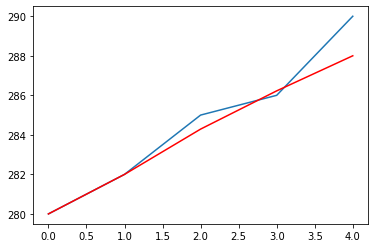

In [415]:
def F(t):
    return np.array([[1, t],
                     [0, 1]])

def B(t):
    return np.array([[0.5*t**2],
                     [    t   ]])

def U(a):
    return a

def inverse(array):
    return np.linalg.inv(array)

def dot(p, *args):
    for arg in args:
        p = np.dot(p, arg)
    return p

# for noise
W = 0
Q = 1e-5

# for F and B
t = 1
a = 2
FT = F(t).transpose()

# for state X
x_position = 4000
v_velocity = 280
X = np.array([[x_position],
              [v_velocity]])

# for variance P
var_x = 20**2
var_v = 5**2
covar = 0
P = np.array([[var_x, covar],
              [covar, var_v]])

# for observation error
err_x = 25**2
err_v = 6**2
R = np.array([[err_x, 0],
              [0, err_v]])

# for observation position
now_x = [4260, 4550, 4860, 5002]
now_v = [282, 285, 286, 287]
Z = np.zeros((len(now_x), 2))
Z = np.array([list(value) for value in zip(now_x, now_v)])

# for Identity Matrix
I = np.array([[1,0],[0,1]])
H = np.array([[1,0],[0,1]])
HT= H.transpose()

trueX_m = [4000, 4260, 4550, 4860, 5110]
trueV_m_sec = [280, 282, 285, 286, 290]

predictedX = [4000]
predictedV = [280]

kalmanX = [4000]
kalmanV = [280]

#======================
# formula
for i in range(4):
    X_= dot(F(t), X) + dot(B(t), U(a)) + W
    P_= dot(F(t), P, FT) + Q
    P_[0,1], P_[1,0] = 0, 0
    
    K = dot(P_, HT) * inverse(dot(H, P_, HT) + R)

    S = Z[i].reshape((2,1)) - dot(H, X_)

    X = X_ + dot(K, S)
    P = dot((I - dot(K, H)), P_)  

    kalmanX.append(X[0,0])
    kalmanV.append(X[1,0])
    
    predictedX.append(X_[0,0])
    predictedV.append(X_[1,0])

plt.plot(range(len(trueV_m_sec)), trueV_m_sec)
plt.plot(range(len(kalmanV)), kalmanV, c='r')
# plt.plot(range(len(predictedY)), predictedY)

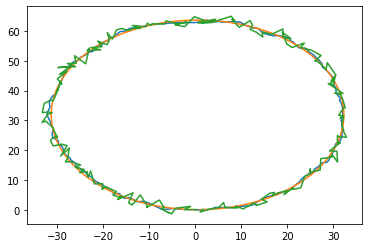

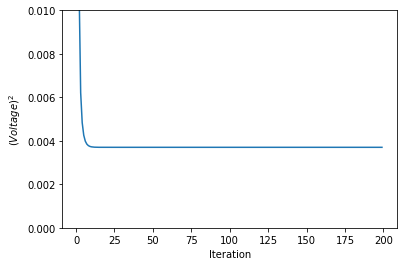

In [283]:
import cv2
import numpy as np
#建立一個大小800*800的空幀
frame = np.zeros((800,800,3),np.uint8)
#初始化測量座標和滑鼠運動預測的陣列
last_measurement = current_measurement = np.array((2,1),np.float32)

last_predicition = current_prediction = np.zeros((2,1),np.float32)
'''
    mousemove()函式在這裡的作用就是傳遞X,Y的座標值，便於對軌跡進行卡爾曼濾波
'''
def mousemove(event,x,y,s,p):
    #定義全域性變數
    global frame,current_measurement,measurements,last_measurement,current_prediction,last_prediction
    #初始化
    last_measurement = current_measurement
    last_prediction = current_prediction
    #傳遞當前測量座標值
    current_measurement = np.array([[np.float32(x)],[np.float32(y)]])
    #用來修正卡爾曼濾波的預測結果
    kalman.correct(current_measurement)
    # 呼叫kalman這個類的predict方法得到狀態的預測值矩陣，用來估算目標位置
    current_prediction = kalman.predict()
    #上一次測量值
    lmx,lmy = last_measurement[0],last_measurement[1]
    #當前測量值
    cmx,cmy = current_measurement[0],current_measurement[1]
    #上一次預測值
    lpx,lpy = last_prediction[0],last_prediction[1]
    #當前預測值
    cpx,cpy = current_prediction[0],current_prediction[1]
    #繪製測量值軌跡（綠色）
    cv2.line(frame,(lmx,lmy),(cmx,cmy),(0,100,0))
    #繪製預測值軌跡（紅色）
    cv2.line(frame,(lpx,lpy),(cpx,cpy),(0,0,200))

cv2.namedWindow("kalman_tracker")
#呼叫函式處理滑鼠事件，具體事件必須由回撥函式的第一個引數來處理，該引數確定觸發事件的型別（點選和移動）
'''
void setMousecallback(const string& winname, MouseCallback onMouse, void* userdata=0)
       winname:視窗的名字
       onMouse:滑鼠響應函式，回撥函式。指定窗口裡每次滑鼠時間發生的時候，被呼叫的函式指標。
                這個函式的原型應該為void on_Mouse(int event, int x, int y, int flags, void* param);
       userdate：傳給回撥函式的引數

 void on_Mouse(int event, int x, int y, int flags, void* param);
        event是 CV_EVENT_*變數之一
        x和y是滑鼠指標在影象座標系的座標（不是視窗座標系）
        flags是CV_EVENT_FLAG的組合， param是使用者定義的傳遞到setMouseCallback函式呼叫的引數。
    常用的event：
        CV_EVENT_MOUSEMOVE
        CV_EVENT_LBUTTONDOWN
        CV_EVENT_RBUTTONDOWN
        CV_EVENT_LBUTTONUP
        CV_EVENT_RBUTTONUP
        和標誌位flags有關的：
        CV_EVENT_FLAG_LBUTTON
'''
cv2.setMouseCallback("kalman_tracker",mousemove)
'''
Kalman這個類需要初始化下面變數：
轉移矩陣，測量矩陣，控制向量(沒有的話，就是0)，
過程噪聲協方差矩陣，測量噪聲協方差矩陣，
後驗錯誤協方差矩陣，前一狀態校正後的值，當前觀察值。
    在此cv2.KalmanFilter(4,2)表示轉移矩陣維度為4，測量矩陣維度為2

卡爾曼濾波模型假設k時刻的真實狀態是從(k − 1)時刻的狀態演化而來，符合下式：
            X(k) = F(k) * X(k-1) + B(k)*U(k) + W（k）
其中
F(k)  是作用在xk−1上的狀態變換模型（/矩陣/向量）。 
B(k)  是作用在控制器向量uk上的輸入－控制模型。 
W(k)  是過程噪聲，並假定其符合均值為零，協方差矩陣為Qk的多元正態分佈。
'''
kalman = cv2.KalmanFilter(4,2)
#設定測量矩陣
kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]],np.float32)
#設定轉移矩陣
kalman.transitionMatrix = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,0],[0,0,0,1]],np.float32)
#設定過程噪聲協方差矩陣
kalman.processNoiseCov = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]],np.float32)*0.03

while True:
    cv2.imshow("kalman_tracker",frame)
    if (cv2.waitKey(30) & 0xff) == 27:
        break

cv2.destroyAllWindows()

In [389]:
np.float32(3)

3.0

In [ ]:
# with open('tracks1.dat', 'rb') as a:
#     for i in range(30000):
#         print(str(a.readline())[2:-1].replace("  ", ",").replace("\\n", ","))

In [123]:
# True Track
# [[1.00000000e+00,0.00000000e+00],
#  [ 1.99950656e+00,3.14107591e-02],
#  [ 2.99753329e+00,9.42012786e-02],
#  [ 3.99309525e+00,1.88309592e-01],
#  [ 4.98520995e+00,3.13642825e-01],
#  [ 5.97289830e+00,4.70077291e-01],
#  [ 6.95518555e+00,6.57458605e-01],
#  [ 7.93110231e+00,8.75601847e-01],
#  [ 8.89968547e+00,1.12429173e+00],
#  [ 9.85997915e+00,1.40328284e+00],
#  [ 1.08110357e+01,1.71229983e+00],
#  [ 1.17519164e+01,2.05103775e+00],
#  [ 1.26816929e+01,2.41916231e+00],
#  [ 1.35994476e+01,2.81631020e+00],
#  [ 1.45042746e+01,3.24208949e+00],
#  [ 1.53952811e+01,3.69607999e+00],
#  [ 1.62715878e+01,4.17783366e+00],
#  [ 1.71323298e+01,4.68687508e+00],
#  [ 1.79766578e+01,5.22270187e+00],
#  [ 1.88037383e+01,5.78478525e+00],
#  [ 1.96127553e+01,6.37257050e+00],
#  [ 2.04029103e+01,6.98547756e+00],
#  [ 2.11734236e+01,7.62290155e+00],
#  [ 2.19235347e+01,8.28421341e+00],
#  [ 2.26525033e+01,8.96876052e+00],
#  [ 2.33596101e+01,9.67586730e+00],
#  [ 2.40441572e+01,1.04048359e+01],
#  [ 2.47054690e+01,1.11549470e+01],
#  [ 2.53428930e+01,1.19254602e+01],
#  [ 2.59558001e+01,1.27156153e+01],
#  [ 2.65435853e+01,1.35246322e+01],
#  [ 2.71056687e+01,1.43517128e+01],
#  [ 2.76414955e+01,1.51960407e+01],
#  [ 2.81505369e+01,1.60567828e+01],
#  [ 2.86322906e+01,1.69330895e+01],
#  [ 2.90862811e+01,1.78240960e+01],
#  [ 2.95120604e+01,1.87289230e+01],
#  [ 2.99092083e+01,1.96466777e+01],
#  [ 3.02773328e+01,2.05764541e+01],
#  [ 3.06160707e+01,2.15173349e+01],
#  [ 3.09250877e+01,2.24683914e+01],
#  [ 3.12040788e+01,2.34286851e+01],
#  [ 3.14527687e+01,2.43972683e+01],
#  [ 3.16709120e+01,2.53731850e+01],
#  [ 3.18582933e+01,2.63554723e+01],
#  [ 3.20147278e+01,2.73431606e+01],
#  [ 3.21400610e+01,2.83352753e+01],
#  [ 3.22341693e+01,2.93308373e+01],
#  [ 3.22969598e+01,3.03288640e+01],
#  [ 3.23283706e+01,3.13283706e+01],
#  [ 3.23283706e+01,3.23283706e+01],
#  [ 3.22969598e+01,3.33278771e+01],
#  [ 3.22341693e+01,3.43259039e+01],
#  [ 3.21400610e+01,3.53214658e+01],
#  [ 3.20147278e+01,3.63135805e+01],
#  [ 3.18582933e+01,3.73012689e+01],
#  [ 3.16709120e+01,3.82835561e+01],
#  [ 3.14527687e+01,3.92594729e+01],
#  [ 3.12040788e+01,4.02280561e+01],
#  [ 3.09250877e+01,4.11883497e+01],
#  [ 3.06160707e+01,4.21394063e+01],
#  [ 3.02773328e+01,4.30802870e+01],
#  [ 2.99092083e+01,4.40100635e+01],
#  [ 2.95120604e+01,4.49278181e+01],
#  [ 2.90862811e+01,4.58326452e+01],
#  [ 2.86322906e+01,4.67236517e+01],
#  [ 2.81505369e+01,4.75999584e+01],
#  [ 2.76414955e+01,4.84607004e+01],
#  [ 2.71056687e+01,4.93050283e+01],
#  [ 2.65435853e+01,5.01321089e+01],
#  [ 2.59558001e+01,5.09411259e+01],
#  [ 2.53428930e+01,5.17312809e+01],
#  [ 2.47054690e+01,5.25017942e+01],
#  [ 2.40441572e+01,5.32519052e+01],
#  [ 2.33596101e+01,5.39808739e+01],
#  [ 2.26525033e+01,5.46879806e+01],
#  [ 2.19235347e+01,5.53725278e+01],
#  [ 2.11734236e+01,5.60338396e+01],
#  [ 2.04029103e+01,5.66712636e+01],
#  [ 1.96127553e+01,5.72841707e+01],
#  [ 1.88037383e+01,5.78719559e+01],
#  [ 1.79766578e+01,5.84340393e+01],
#  [ 1.71323298e+01,5.89698661e+01],
#  [ 1.62715878e+01,5.94789075e+01],
#  [ 1.53952811e+01,5.99606612e+01],
#  [ 1.45042746e+01,6.04146517e+01],
#  [ 1.35994476e+01,6.08404310e+01],
#  [ 1.26816929e+01,6.12375789e+01],
#  [ 1.17519164e+01,6.16057034e+01],
#  [ 1.08110357e+01,6.19444413e+01],
#  [ 9.85997915e+00,6.22534583e+01],
#  [ 8.89968547e+00,6.25324494e+01],
#  [ 7.93110231e+00,6.27811393e+01],
#  [ 6.95518555e+00,6.29992826e+01],
#  [ 5.97289830e+00,6.31866639e+01],
#  [ 4.98520995e+00,6.33430983e+01],
#  [ 3.99309525e+00,6.34684316e+01],
#  [ 2.99753329e+00,6.35625399e+01],
#  [ 1.99950656e+00,6.36253304e+01],
#  [ 1.00000000e+00,6.36567412e+01],
#  [-2.13162821e-14,6.36567412e+01],
#  [-9.99506560e-01,6.36253304e+01],
#  [-1.99753329e+00,6.35625399e+01],
#  [-2.99309525e+00,6.34684316e+01],
#  [-3.98520995e+00,6.33430983e+01],
#  [-4.97289830e+00,6.31866639e+01],
#  [-5.95518555e+00,6.29992826e+01],
#  [-6.93110231e+00,6.27811393e+01],
#  [-7.89968547e+00,6.25324494e+01],
#  [-8.85997915e+00,6.22534583e+01],
#  [-9.81103567e+00,6.19444413e+01],
#  [-1.07519164e+01,6.16057034e+01],
#  [-1.16816929e+01,6.12375789e+01],
#  [-1.25994476e+01,6.08404310e+01],
#  [-1.35042746e+01,6.04146517e+01],
#  [-1.43952811e+01,5.99606612e+01],
#  [-1.52715878e+01,5.94789075e+01],
#  [-1.61323298e+01,5.89698661e+01],
#  [-1.69766578e+01,5.84340393e+01],
#  [-1.78037383e+01,5.78719559e+01],
#  [-1.86127553e+01,5.72841707e+01],
#  [-1.94029103e+01,5.66712636e+01],
#  [-2.01734236e+01,5.60338396e+01],
#  [-2.09235347e+01,5.53725278e+01],
#  [-2.16525033e+01,5.46879806e+01],
#  [-2.23596101e+01,5.39808739e+01],
#  [-2.30441572e+01,5.32519052e+01],
#  [-2.37054690e+01,5.25017942e+01],
#  [-2.43428930e+01,5.17312809e+01],
#  [-2.49558001e+01,5.09411259e+01],
#  [-2.55435853e+01,5.01321089e+01],
#  [-2.61056687e+01,4.93050283e+01],
#  [-2.66414955e+01,4.84607004e+01],
#  [-2.71505369e+01,4.75999584e+01],
#  [-2.76322906e+01,4.67236517e+01],
#  [-2.80862811e+01,4.58326452e+01],
#  [-2.85120604e+01,4.49278181e+01],
#  [-2.89092083e+01,4.40100635e+01],
#  [-2.92773328e+01,4.30802870e+01],
#  [-2.96160707e+01,4.21394063e+01],
#  [-2.99250877e+01,4.11883497e+01],
#  [-3.02040788e+01,4.02280561e+01],
#  [-3.04527687e+01,3.92594729e+01],
#  [-3.06709120e+01,3.82835561e+01],
#  [-3.08582933e+01,3.73012689e+01],
#  [-3.10147278e+01,3.63135805e+01],
#  [-3.11400610e+01,3.53214658e+01],
#  [-3.12341693e+01,3.43259039e+01],
#  [-3.12969598e+01,3.33278771e+01],
#  [-3.13283706e+01,3.23283706e+01],
#  [-3.13283706e+01,3.13283706e+01],
#  [-3.12969598e+01,3.03288640e+01],
#  [-3.12341693e+01,2.93308373e+01],
#  [-3.11400610e+01,2.83352753e+01],
#  [-3.10147278e+01,2.73431606e+01],
#  [-3.08582933e+01,2.63554723e+01],
#  [-3.06709120e+01,2.53731850e+01],
#  [-3.04527687e+01,2.43972683e+01],
#  [-3.02040788e+01,2.34286851e+01],
#  [-2.99250877e+01,2.24683914e+01],
#  [-2.96160707e+01,2.15173349e+01],
#  [-2.92773328e+01,2.05764541e+01],
#  [-2.89092083e+01,1.96466777e+01],
#  [-2.85120604e+01,1.87289230e+01],
#  [-2.80862811e+01,1.78240960e+01],
#  [-2.76322906e+01,1.69330895e+01],
#  [-2.71505369e+01,1.60567828e+01],
#  [-2.66414955e+01,1.51960407e+01],
#  [-2.61056687e+01,1.43517128e+01],
#  [-2.55435853e+01,1.35246322e+01],
#  [-2.49558001e+01,1.27156153e+01],
#  [-2.43428930e+01,1.19254602e+01],
#  [-2.37054690e+01,1.11549470e+01],
#  [-2.30441572e+01,1.04048359e+01],
#  [-2.23596101e+01,9.67586730e+00],
#  [-2.16525033e+01,8.96876052e+00],
#  [-2.09235347e+01,8.28421341e+00],
#  [-2.01734236e+01,7.62290155e+00],
#  [-1.94029103e+01,6.98547756e+00],
#  [-1.86127553e+01,6.37257050e+00],
#  [-1.78037383e+01,5.78478525e+00],
#  [-1.69766578e+01,5.22270187e+00],
#  [-1.61323298e+01,4.68687508e+00],
#  [-1.52715878e+01,4.17783366e+00],
#  [-1.43952811e+01,3.69607999e+00],
#  [-1.35042746e+01,3.24208949e+00],
#  [-1.25994476e+01,2.81631020e+00],
#  [-1.16816929e+01,2.41916231e+00],
#  [-1.07519164e+01,2.05103775e+00],
#  [-9.81103567e+00,1.71229983e+00],
#  [-8.85997915e+00,1.40328284e+00],
#  [-7.89968547e+00,1.12429173e+00],
#  [-6.93110231e+00,8.75601847e-01],
#  [-5.95518555e+00,6.57458605e-01],
#  [-4.97289830e+00,4.70077291e-01],
#  [-3.98520995e+00,3.13642825e-01],
#  [-2.99309525e+00,1.88309592e-01],
#  [-1.99753329e+00,9.42012786e-02],
#  [-9.99506560e-01,3.14107591e-02],
#  [-8.85180818e-13,-2.97456504e-13]])

In [ ]:
# Track1
# [[ 1.65675138e+00,1.04948187e-01],
#  [ 1.04340664e+00,-8.03613207e-01],
#  [ 3.32975888e+00,2.70582517e-01],
#  [ 3.46540198e+00,2.42796077e-01],
#  [ 5.09636258e+00,7.14719724e-01],
#  [ 6.17796887e+00,2.40186652e+00],
#  [ 6.46512113e+00,6.78720329e-01],
#  [ 9.22597602e+00,6.16120382e-01],
#  [ 8.73178693e+00,1.21675692e+00],
#  [ 1.04295135e+01,2.64727023e-01],
#  [ 1.08479145e+01,6.48364453e-01],
#  [ 1.27861035e+01,2.25565332e+00],
#  [ 1.33666467e+01,1.44472730e+00],
#  [ 1.32670676e+01,1.40899418e+00],
#  [ 1.56292281e+01,2.59784641e+00],
#  [ 1.43972646e+01,3.52892412e+00],
#  [ 1.61782945e+01,5.50000153e+00],
#  [ 1.72279170e+01,5.79448559e+00],
#  [ 1.67738246e+01,4.58925503e+00],
#  [ 1.78965750e+01,5.59895200e+00],
#  [ 1.99576281e+01,6.40904357e+00],
#  [ 1.93373902e+01,5.06221109e+00],
#  [ 2.12985418e+01,7.40705331e+00],
#  [ 2.11447677e+01,6.78257643e+00],
#  [ 2.29460026e+01,7.33222946e+00],
#  [ 2.35907149e+01,1.02653128e+01],
#  [ 2.38527926e+01,1.11925295e+01],
#  [ 2.48308974e+01,1.20914844e+01],
#  [ 2.50328430e+01,1.37519524e+01],
#  [ 2.49602050e+01,1.26177878e+01],
#  [ 2.60194144e+01,1.29780208e+01],
#  [ 2.61506726e+01,1.29622346e+01],
#  [ 2.71699298e+01,1.33125132e+01],
#  [ 2.73155709e+01,1.71428285e+01],
#  [ 2.97607030e+01,1.76497498e+01],
#  [ 2.96916657e+01,1.86884647e+01],
#  [ 3.09549380e+01,1.59970051e+01],
#  [ 3.08214757e+01,1.96254823e+01],
#  [ 2.92117310e+01,1.97058296e+01],
#  [ 3.15675222e+01,2.25455597e+01],
#  [ 3.09357131e+01,2.20334136e+01],
#  [ 3.09327338e+01,2.49463446e+01],
#  [ 3.11274384e+01,2.45323236e+01],
#  [ 3.28852535e+01,2.43160575e+01],
#  [ 3.27513576e+01,2.48368764e+01],
#  [ 3.22748680e+01,2.62016156e+01],
#  [ 3.22873464e+01,2.66460814e+01],
#  [ 3.18769508e+01,2.87018925e+01],
#  [ 3.23274447e+01,3.14752979e+01],
#  [ 3.15429138e+01,3.06687718e+01],
#  [ 3.20386416e+01,3.15688870e+01],
#  [ 3.12025495e+01,3.16982969e+01],
#  [ 3.23349406e+01,3.42816498e+01],
#  [ 3.26184761e+01,3.41715961e+01],
#  [ 3.21508249e+01,3.68030095e+01],
#  [ 3.16396028e+01,3.85900268e+01],
#  [ 3.11703325e+01,3.87908864e+01],
#  [ 3.03584143e+01,3.91500403e+01],
#  [ 3.21356521e+01,3.90378759e+01],
#  [ 2.89209884e+01,4.24137816e+01],
#  [ 3.00260830e+01,4.17305617e+01],
#  [ 3.04510136e+01,4.49032586e+01],
#  [ 2.95811763e+01,4.24313982e+01],
#  [ 2.96440160e+01,4.35390540e+01],
#  [ 3.06212328e+01,4.51098151e+01],
#  [ 2.87261643e+01,4.93965645e+01],
#  [ 2.84620823e+01,4.69884386e+01],
#  [ 2.76665447e+01,4.83550231e+01],
#  [ 2.64088226e+01,5.00402354e+01],
#  [ 2.60009509e+01,4.99092635e+01],
#  [ 2.73745078e+01,5.17422644e+01],
#  [ 2.51744186e+01,5.36429596e+01],
#  [ 2.44297688e+01,5.36944534e+01],
#  [ 2.46263408e+01,5.37056374e+01],
#  [ 2.37992171e+01,5.43264148e+01],
#  [ 2.28617888e+01,5.43086215e+01],
#  [ 2.37359285e+01,5.59742299e+01],
#  [ 2.10613192e+01,5.44697836e+01],
#  [ 1.99362149e+01,5.55922207e+01],
#  [ 1.89248947e+01,5.95943700e+01],
#  [ 2.08342531e+01,5.73791437e+01],
#  [ 1.91706412e+01,5.78478238e+01],
#  [ 1.90643754e+01,6.06721042e+01],
#  [ 1.66449383e+01,5.89089601e+01],
#  [ 1.45380620e+01,5.97182591e+01],
#  [ 1.46999033e+01,5.79719365e+01],
#  [ 1.32888058e+01,5.95700788e+01],
#  [ 1.19378036e+01,6.05410728e+01],
#  [ 1.24467047e+01,6.19756606e+01],
#  [ 1.19472189e+01,6.34839459e+01],
#  [ 9.55383648e+00,6.12525432e+01],
#  [ 7.97375785e+00,6.38732287e+01],
#  [ 8.60902744e+00,6.33786593e+01],
#  [ 7.82425846e+00,6.49511839e+01],
#  [ 5.21346203e+00,6.36928418e+01],
#  [ 3.84921726e+00,6.28972740e+01],
#  [ 1.28649773e+00,6.25691212e+01],
#  [ 4.38255701e+00,6.39084129e+01],
#  [ 6.05261996e-01,6.27014136e+01],
#  [ 1.91585608e+00,6.35914084e+01],
#  [-2.00627125e-01,6.48160529e+01],
#  [-2.26568861e+00,6.14984227e+01],
#  [-4.40656164e+00,6.20588956e+01],
#  [-1.87009248e+00,6.30700783e+01],
#  [-2.68132534e+00,6.27047517e+01],
#  [-4.05327501e+00,6.23835748e+01],
#  [-6.33066289e+00,6.34384427e+01],
#  [-6.67798664e+00,6.23706630e+01],
#  [-9.40737593e+00,6.24127549e+01],
#  [-9.65092565e+00,6.18668943e+01],
#  [-1.04287471e+01,6.26161157e+01],
#  [-1.07678602e+01,6.14271722e+01],
#  [-1.36855240e+01,6.18776627e+01],
#  [-1.18655111e+01,6.08816330e+01],
#  [-1.34099618e+01,6.09226671e+01],
#  [-1.46257627e+01,6.01956803e+01],
#  [-1.59809481e+01,6.08558662e+01],
#  [-1.71217478e+01,6.03804033e+01],
#  [-1.80249498e+01,5.73039388e+01],
#  [-1.91601118e+01,5.94260940e+01],
#  [-1.86752358e+01,5.70346305e+01],
#  [-1.91768897e+01,5.54040493e+01],
#  [-2.12091201e+01,5.65726918e+01],
#  [-2.02542279e+01,5.47280111e+01],
#  [-2.26843376e+01,5.44443591e+01],
#  [-2.05577604e+01,5.36687238e+01],
#  [-2.35452896e+01,5.33807147e+01],
#  [-2.30444170e+01,5.43033589e+01],
#  [-2.38508854e+01,4.89932857e+01],
#  [-2.62735028e+01,5.17075148e+01],
#  [-2.59187565e+01,4.91499091e+01],
#  [-2.78544378e+01,4.90641261e+01],
#  [-2.60429068e+01,4.80189038e+01],
#  [-2.98641348e+01,4.77297437e+01],
#  [-2.72329526e+01,4.80114908e+01],
#  [-2.95599484e+01,4.54259921e+01],
#  [-2.79686844e+01,4.64192634e+01],
#  [-3.00006191e+01,4.39169761e+01],
#  [-2.90473775e+01,4.20578877e+01],
#  [-2.92525328e+01,4.32953464e+01],
#  [-2.99973659e+01,3.99216788e+01],
#  [-2.98822389e+01,4.03811319e+01],
#  [-2.98443892e+01,4.05971641e+01],
#  [-3.05951280e+01,3.75987948e+01],
#  [-3.09662447e+01,3.64639405e+01],
#  [-3.14741481e+01,3.68087964e+01],
#  [-3.28553231e+01,3.56517734e+01],
#  [-3.33028751e+01,3.25899479e+01],
#  [-3.19274037e+01,3.28136732e+01],
#  [-3.11367285e+01,3.25380345e+01],
#  [-3.20790195e+01,3.20096591e+01],
#  [-3.33351767e+01,2.92925312e+01],
#  [-3.25463247e+01,2.97541572e+01],
#  [-3.10791733e+01,2.76652961e+01],
#  [-3.09268376e+01,2.73216795e+01],
#  [-2.99867815e+01,2.40676400e+01],
#  [-3.00663590e+01,2.47275701e+01],
#  [-3.11609300e+01,2.39004819e+01],
#  [-3.15261475e+01,2.32165646e+01],
#  [-3.08837662e+01,2.13913381e+01],
#  [-2.90953258e+01,2.20107937e+01],
#  [-2.78848445e+01,2.14814415e+01],
#  [-2.92680284e+01,1.80211692e+01],
#  [-2.74094665e+01,2.06610128e+01],
#  [-2.77581956e+01,1.72194696e+01],
#  [-2.82500251e+01,1.60742218e+01],
#  [-2.70808624e+01,1.60999376e+01],
#  [-2.49393297e+01,1.50348503e+01],
#  [-2.61340256e+01,1.42598926e+01],
#  [-2.41711021e+01,1.34911433e+01],
#  [-2.50786651e+01,1.23983155e+01],
#  [-2.51265467e+01,1.24741003e+01],
#  [-2.35450690e+01,1.28085804e+01],
#  [-2.33245295e+01,1.08307420e+01],
#  [-2.27512700e+01,1.29657799e+01],
#  [-2.19495118e+01,8.67005543e+00],
#  [-2.01463580e+01,8.73472883e+00],
#  [-2.02783466e+01,6.75866449e+00],
#  [-1.95539724e+01,7.78320682e+00],
#  [-1.71327642e+01,6.03481605e+00],
#  [-1.79274492e+01,4.91702795e+00],
#  [-1.66799288e+01,4.25954341e+00],
#  [-1.59767195e+01,4.55962446e+00],
#  [-1.68964556e+01,3.41140403e+00],
#  [-1.35236069e+01,5.65302251e+00],
#  [-1.45116400e+01,2.32064238e+00],
#  [-1.37265394e+01,1.57080151e+00],
#  [-1.19652761e+01,4.95403080e+00],
#  [-1.04431784e+01,1.35360930e+00],
#  [-1.05608754e+01,7.35815250e-01],
#  [-7.83078036e+00,3.24566785e+00],
#  [-6.70806125e+00,6.11820826e-01],
#  [-7.45474373e+00,3.95807547e-01],
#  [-5.81751912e+00,-1.08674704e+00],
#  [-5.93332975e+00,-7.91406401e-01],
#  [-5.15650899e+00,-1.42411567e+00],
#  [-4.27069247e+00,4.87129565e-01],
#  [-1.01172003e+00,1.10913476e+00],
#  [-2.39369659e+00,-1.17983336e-03],
#  [ 3.73882500e-01,1.02578216e-02]]

In [ ]:
# Track2
# [[ 1.19856140e+00,-6.58280852e-01],
#  [ 1.74332552e+00,-6.60347185e-01],
#  [ 3.03333932e+00,-1.40082103e-01],
#  [ 6.19625744e+00,-3.25757157e-01],
#  [ 5.50692933e+00,7.81552419e-01],
#  [ 4.28770753e+00,3.89867007e+00],
#  [ 8.58104555e+00,-1.31679601e+00],
#  [ 8.55633194e+00,8.69297952e-01],
#  [ 9.76768858e+00,1.79030752e-01],
#  [ 9.04004233e+00,5.96912994e-01],
#  [ 1.00974366e+01,4.19938878e-01],
#  [ 1.14049781e+01,2.14432023e+00],
#  [ 1.27838995e+01,3.59534752e+00],
#  [ 1.34170428e+01,1.44582043e+00],
#  [ 1.31920510e+01,3.57293982e+00],
#  [ 1.63795133e+01,3.28797968e+00],
#  [ 1.48593020e+01,5.03211112e+00],
#  [ 1.67716872e+01,3.79690152e+00],
#  [ 1.78086472e+01,5.87403509e+00],
#  [ 1.74524828e+01,5.93215608e+00],
#  [ 1.98814234e+01,6.19141611e+00],
#  [ 2.31537099e+01,6.61003474e+00],
#  [ 2.16854140e+01,8.29796838e+00],
#  [ 2.21403399e+01,1.05876196e+01],
#  [ 2.20483290e+01,8.92221268e+00],
#  [ 2.49529068e+01,9.13574879e+00],
#  [ 2.25902182e+01,1.15170828e+01],
#  [ 2.27303384e+01,1.14472350e+01],
#  [ 2.42710055e+01,1.27503950e+01],
#  [ 2.73806586e+01,1.34681942e+01],
#  [ 2.72449089e+01,1.25046382e+01],
#  [ 2.75308841e+01,1.58982393e+01],
#  [ 2.72258466e+01,1.63077794e+01],
#  [ 2.82892042e+01,1.75620957e+01],
#  [ 2.81168892e+01,1.64636394e+01],
#  [ 3.00566207e+01,1.90424130e+01],
#  [ 2.89791346e+01,1.61073844e+01],
#  [ 2.98857839e+01,1.99134455e+01],
#  [ 3.10438234e+01,2.02204698e+01],
#  [ 3.14799098e+01,2.13194039e+01],
#  [ 3.00406955e+01,2.32992522e+01],
#  [ 3.17472697e+01,2.38975697e+01],
#  [ 3.03314324e+01,2.46079819e+01],
#  [ 3.31280818e+01,2.61565049e+01],
#  [ 3.36630952e+01,2.55125719e+01],
#  [ 3.11774309e+01,2.77774855e+01],
#  [ 3.16673743e+01,2.90586620e+01],
#  [ 3.37121402e+01,3.25671684e+01],
#  [ 3.07357041e+01,3.20196471e+01],
#  [ 3.29373012e+01,3.18945740e+01],
#  [ 3.23994206e+01,3.18867921e+01],
#  [ 3.28001955e+01,3.44017357e+01],
#  [ 3.28765354e+01,3.44664435e+01],
#  [ 3.29112365e+01,3.48018386e+01],
#  [ 3.24090444e+01,3.62821757e+01],
#  [ 3.35695497e+01,3.78096133e+01],
#  [ 3.16437614e+01,3.89562021e+01],
#  [ 3.09954357e+01,3.77731523e+01],
#  [ 3.09493402e+01,4.12718664e+01],
#  [ 3.07310437e+01,4.08779641e+01],
#  [ 3.01843872e+01,4.15244933e+01],
#  [ 3.20017353e+01,4.44563536e+01],
#  [ 2.90824669e+01,4.50399511e+01],
#  [ 3.11965281e+01,4.57077790e+01],
#  [ 3.08324575e+01,4.50766785e+01],
#  [ 2.67001126e+01,4.68893935e+01],
#  [ 2.81217679e+01,4.69455504e+01],
#  [ 2.70742590e+01,4.62524685e+01],
#  [ 2.92596310e+01,4.89358305e+01],
#  [ 2.67461959e+01,5.07657832e+01],
#  [ 2.54169946e+01,5.01934040e+01],
#  [ 2.47759970e+01,5.18971181e+01],
#  [ 2.49419935e+01,5.35336036e+01],
#  [ 2.39469513e+01,5.32224755e+01],
#  [ 2.40918229e+01,5.42040635e+01],
#  [ 2.21995075e+01,5.56712082e+01],
#  [ 2.03810723e+01,5.52245729e+01],
#  [ 2.27507337e+01,5.51858195e+01],
#  [ 2.17564538e+01,5.52888871e+01],
#  [ 1.98069012e+01,5.71657563e+01],
#  [ 1.94537561e+01,5.95236719e+01],
#  [ 1.82928283e+01,5.82208991e+01],
#  [ 1.78389992e+01,5.68124443e+01],
#  [ 1.60695130e+01,5.89868214e+01],
#  [ 1.50172554e+01,5.96784212e+01],
#  [ 1.46835674e+01,6.09379653e+01],
#  [ 1.43836057e+01,5.97192729e+01],
#  [ 1.25802059e+01,6.07002046e+01],
#  [ 1.07229234e+01,6.21919795e+01],
#  [ 1.06429570e+01,6.20954871e+01],
#  [ 9.02369008e+00,6.25530160e+01],
#  [ 7.71905259e+00,6.30733896e+01],
#  [ 7.99558556e+00,6.24829306e+01],
#  [ 8.28605870e+00,6.21231017e+01],
#  [ 5.76852334e+00,6.31252490e+01],
#  [ 4.91824905e+00,6.32258428e+01],
#  [ 4.30645575e+00,6.50434304e+01],
#  [ 1.58505423e+00,6.42852123e+01],
#  [ 3.13838286e+00,6.38818512e+01],
#  [ 8.03065776e-02,6.30242474e+01],
#  [-3.51396884e-02,6.31723081e+01],
#  [-1.50833051e+00,6.36343852e+01],
#  [-2.67982467e+00,6.47736356e+01],
#  [-4.90277013e+00,6.32210559e+01],
#  [-5.46276144e+00,6.19261500e+01],
#  [-4.79665424e+00,6.39121027e+01],
#  [-4.78961859e+00,6.20995512e+01],
#  [-5.23644686e+00,6.30287300e+01],
#  [-6.86012274e+00,6.17722759e+01],
#  [-8.88981832e+00,6.06131012e+01],
#  [-1.08539818e+01,6.26679772e+01],
#  [-1.00524618e+01,6.29828551e+01],
#  [-1.31826355e+01,6.09868643e+01],
#  [-1.12658535e+01,6.04827470e+01],
#  [-1.40740036e+01,6.12341377e+01],
#  [-1.39595441e+01,5.87186989e+01],
#  [-1.38563369e+01,5.93393179e+01],
#  [-1.56367637e+01,6.05052094e+01],
#  [-1.75363503e+01,5.70896818e+01],
#  [-1.79964257e+01,5.77057343e+01],
#  [-1.74565798e+01,5.76650712e+01],
#  [-1.96196793e+01,5.68313501e+01],
#  [-1.93769888e+01,5.61933268e+01],
#  [-2.23707099e+01,5.53670885e+01],
#  [-2.06090963e+01,5.42555212e+01],
#  [-2.32830090e+01,5.38013817e+01],
#  [-2.36492534e+01,5.29793317e+01],
#  [-2.45607791e+01,5.38847648e+01],
#  [-2.51161549e+01,5.16431415e+01],
#  [-2.38720349e+01,5.01720926e+01],
#  [-2.39969985e+01,4.87950246e+01],
#  [-2.64891066e+01,5.04654043e+01],
#  [-2.44412709e+01,4.81002189e+01],
#  [-2.64107623e+01,4.86684241e+01],
#  [-2.84322168e+01,4.66103236e+01],
#  [-2.92522832e+01,4.45466521e+01],
#  [-2.85771108e+01,4.67202412e+01],
#  [-2.71440821e+01,4.43235398e+01],
#  [-2.99882881e+01,4.49106793e+01],
#  [-2.98906909e+01,4.19817549e+01],
#  [-2.97455546e+01,4.14249948e+01],
#  [-3.01695342e+01,4.00072774e+01],
#  [-3.11752374e+01,3.87076131e+01],
#  [-3.19600991e+01,3.82801523e+01],
#  [-3.13211713e+01,3.80810727e+01],
#  [-3.09068268e+01,3.53686427e+01],
#  [-3.08406473e+01,3.49578977e+01],
#  [-2.98793749e+01,3.40588489e+01],
#  [-3.16924887e+01,3.27541215e+01],
#  [-3.21454153e+01,3.08949799e+01],
#  [-3.15758599e+01,3.05140508e+01],
#  [-3.27223817e+01,3.06643349e+01],
#  [-3.03341230e+01,2.93355280e+01],
#  [-3.10457093e+01,3.03594627e+01],
#  [-3.01915343e+01,2.68841280e+01],
#  [-3.25155638e+01,2.36735746e+01],
#  [-3.12660334e+01,2.66985212e+01],
#  [-2.79030585e+01,2.57971412e+01],
#  [-2.93506006e+01,2.31168582e+01],
#  [-3.00422797e+01,2.24898492e+01],
#  [-3.06567007e+01,2.23885946e+01],
#  [-2.84260237e+01,1.81680475e+01],
#  [-3.00380114e+01,2.13522479e+01],
#  [-2.86444453e+01,2.00416391e+01],
#  [-2.98456287e+01,1.65152176e+01],
#  [-2.50101737e+01,1.63208840e+01],
#  [-2.65119201e+01,1.61326835e+01],
#  [-2.81168682e+01,1.41141214e+01],
#  [-2.71339689e+01,1.41311360e+01],
#  [-2.53357401e+01,1.43008737e+01],
#  [-2.54309893e+01,1.36707932e+01],
#  [-2.40694589e+01,1.44027919e+01],
#  [-2.47604793e+01,1.17760962e+01],
#  [-2.33706123e+01,8.74691596e+00],
#  [-2.28799247e+01,1.06483856e+01],
#  [-2.14941312e+01,8.19417467e+00],
#  [-2.04880962e+01,8.41559964e+00],
#  [-1.96135059e+01,8.33743337e+00],
#  [-1.83215601e+01,9.12018024e+00],
#  [-1.90077065e+01,7.06883581e+00],
#  [-1.65738663e+01,5.75165502e+00],
#  [-1.76330379e+01,3.79501811e+00],
#  [-1.53540771e+01,5.35024497e+00],
#  [-1.40665427e+01,3.19820721e+00],
#  [-1.57271960e+01,3.29261803e+00],
#  [-1.38532443e+01,2.16024628e+00],
#  [-1.35135887e+01,2.82470538e+00],
#  [-1.21301613e+01,2.70937785e+00],
#  [-1.11925792e+01,1.70311771e+00],
#  [-8.60883957e+00,1.68578413e+00],
#  [-7.79556124e+00,1.31244396e+00],
#  [-6.41598469e+00,2.27675956e+00],
#  [-6.47127431e+00,8.99135111e-01],
#  [-6.85811890e+00,4.41418188e-01],
#  [-4.12335865e+00,-3.61469041e-01],
#  [-4.54223882e+00,-6.86389287e-01],
#  [-3.97107804e+00,1.23332325e+00],
#  [-1.58995405e+00,2.03368814e-01],
#  [-2.25559203e+00,-8.66699419e-02],
#  [ 3.77451100e-01,-5.74012423e-01]]